In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
x = np.linspace(-4, 4, 201).reshape(-1,1)
x = np.concatenate([x, x], 1)
y =[]
for i in range(len(x)):
    y.append( [np.cos(x[i,0])+0.1*x[i,1]**2, np.sin(x[i,1])+x[i,0]**3]   )
y = np.array(y)

idx = np.random.permutation(np.arange(len(x)))
test_ratio=0.2
train_x = x[idx[int(test_ratio*len(x)):]]
train_y = y[idx[int(test_ratio*len(x)):]]
test_x  = x[idx[:int(test_ratio*len(x))]]      
test_y  = y[idx[:int(test_ratio*len(x))]]      
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(161, 2) (161, 2)
(40, 2) (40, 2)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
class SKLearn:
    def __init__(self, inputs, targets, hidden_num=256):

        self.inputs  = inputs
        self.targets = targets
        
        self.pca = PCA(whiten=True)
        self.sc  = StandardScaler()
        self.pca.fit(inputs)
        self.sc.fit(targets)
        self.inputs  = self.pca.transform(inputs)
        self.targets = self.sc.transform(targets)
        
        #self.model = LinearRegression()
        self.model = RandomForestRegressor()
        
    def train(self):
        self.model.fit(self.inputs, self.targets)
        
    def predict(self, inputs):
        inputs_pca = self.pca.transform(inputs)
        targets_sc = self.model.predict(inputs_pca)
        return self.sc.inverse_transform(targets_sc)

In [4]:
reg = SKLearn(train_x, train_y)

In [5]:
reg.train()

In [6]:
test_pred = reg.predict(test_x)

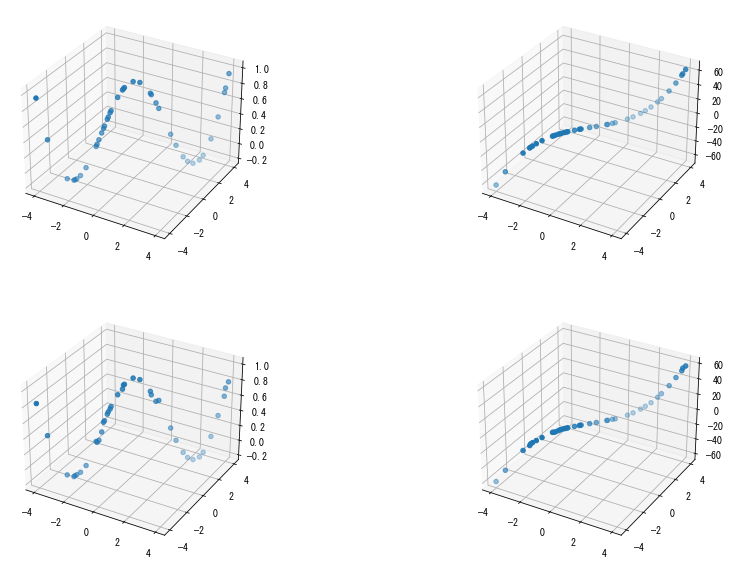

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['font.family'] = "MS Gothic"

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(test_x[:,0], test_x[:,1], test_y[:,:1])

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(test_x[:,0], test_x[:,1], test_y[:,1:])

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(test_x[:,0], test_x[:,1], test_pred[:,:1])

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(test_x[:,0], test_x[:,1], test_pred[:,1:])